In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
motor=pd.read_csv("/Users/apple/Documents/Projects/pmsm_temperature_data.csv")
motor.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

# EDA

In [3]:
motor.shape

(998070, 13)

In [4]:
motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [5]:
motor.describe().T

count       mean        std       min        25%  \
ambient         998070.0  -0.003905   0.993127 -8.573954  -0.599385   
coolant         998070.0   0.004723   1.002423 -1.429349  -1.037925   
u_d             998070.0   0.004780   0.997878 -1.655373  -0.826359   
u_q             998070.0  -0.005690   1.002330 -1.861463  -0.927390   
motor_speed     998070.0  -0.006336   1.001229 -1.371529  -0.951892   
torque          998070.0  -0.003333   0.997907 -3.345953  -0.266917   
i_d             998070.0   0.006043   0.998994 -3.245874  -0.756296   
i_q             998070.0  -0.003194   0.997912 -3.341639  -0.257269   
pm              998070.0  -0.004396   0.995686 -2.631991  -0.672308   
stator_yoke     998070.0   0.000609   1.001049 -1.834688  -0.747265   
stator_tooth    998070.0  -0.002208   0.999597 -2.066143  -0.761951   
stator_winding  998070.0  -0.003935   0.998343 -2.019973  -0.725622   
profile_id      998070.0  50.732001  22.073125  4.000000  32.000000   

                      50%        75%        max  
ambient          0.266157   0.686675   2.967117  
coolant         -0.177187   0.650709   2.649032  
u_d              0.267542   0.358491   2.274734  
u_q             -0.099818   0.852625   1.793498  
motor_speed     -0.140246   0.853584   2.024164  
torque          -0.187246   0.547171   3.016971  
i_d              0.213935   1.013975   1.060937  
i_q             -0.190076   0.499260   2.914185  
pm               0.094367   0.680691   2.917456  
stator_yoke     -0.057226   0.697344   2.449158  
stator_tooth     0.005085   0.772239   2.326668  
stator_winding   0.006536   0.725660   2.653781  
profile_id      56.000000  68.000000  81.000000

In [6]:
#checking correlation with respect to torque
motor.corr()['torque']

ambient          -0.262264
coolant          -0.189617
u_d              -0.821325
u_q              -0.037262
motor_speed       0.024517
torque            1.000000
i_d              -0.239059
i_q               0.996560
pm               -0.072905
stator_yoke      -0.092207
stator_tooth     -0.011055
stator_winding    0.080981
profile_id       -0.257446
Name: torque, dtype: float64

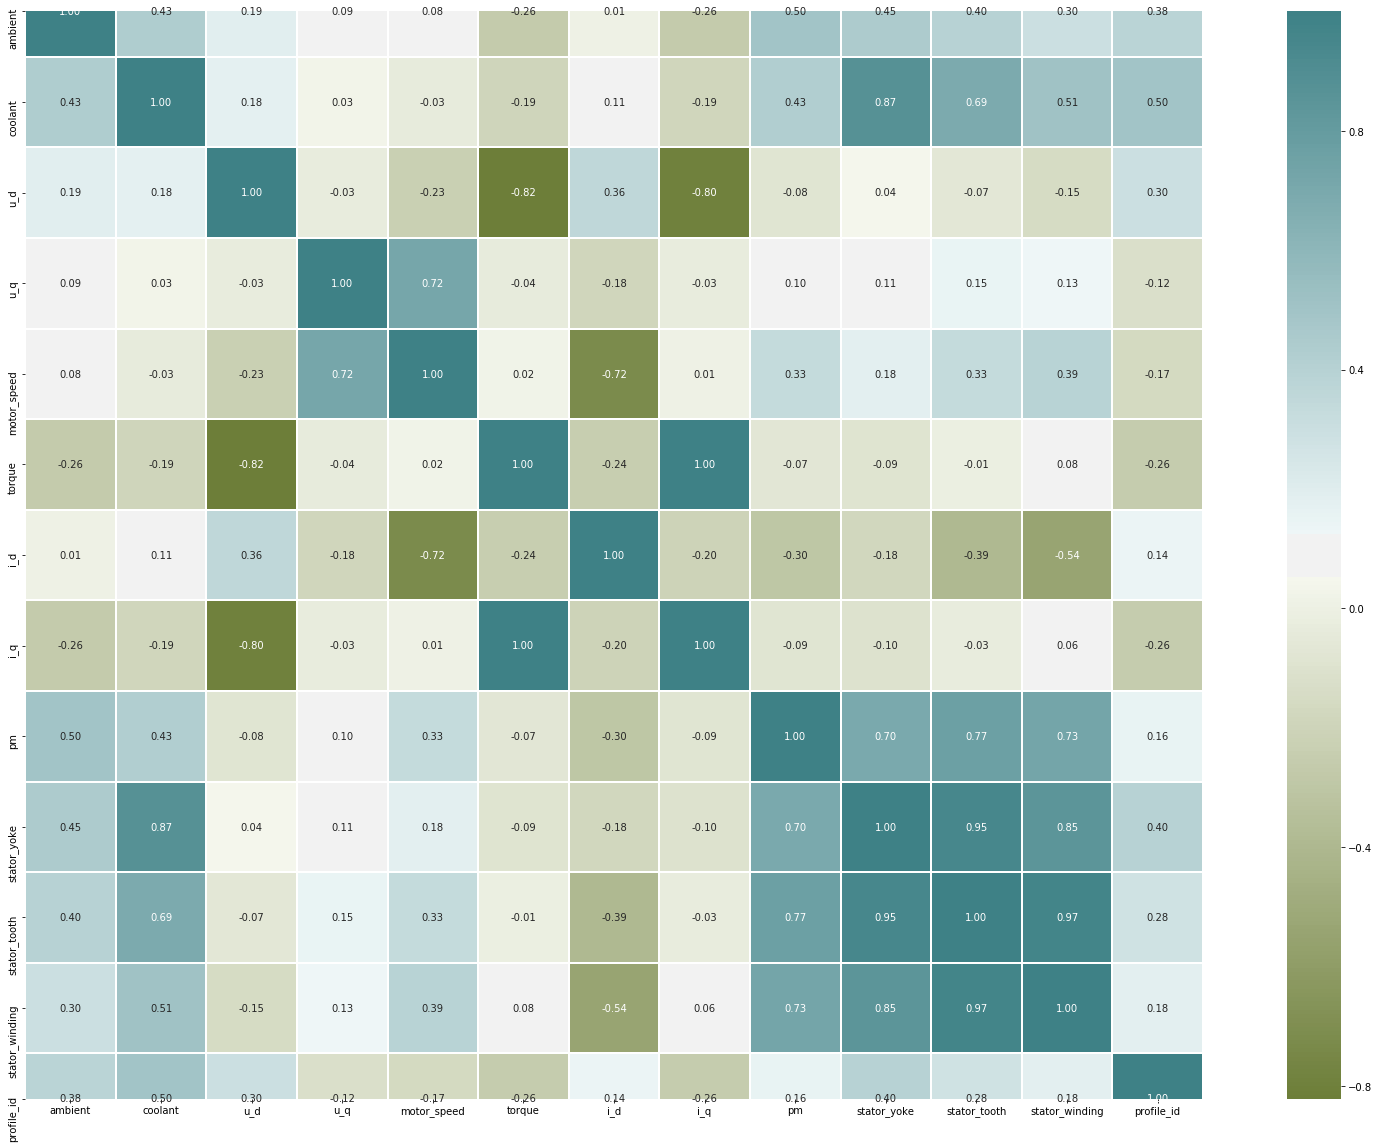

In [7]:
#correlation map
ax=plt.subplots(figsize=(30,20))
corr=motor.corr()

sns.heatmap(corr, annot=True, linewidths=1, fmt='.2f', 
            mask= np.zeros_like(corr,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

In [8]:
#checking for missing data 
motor.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

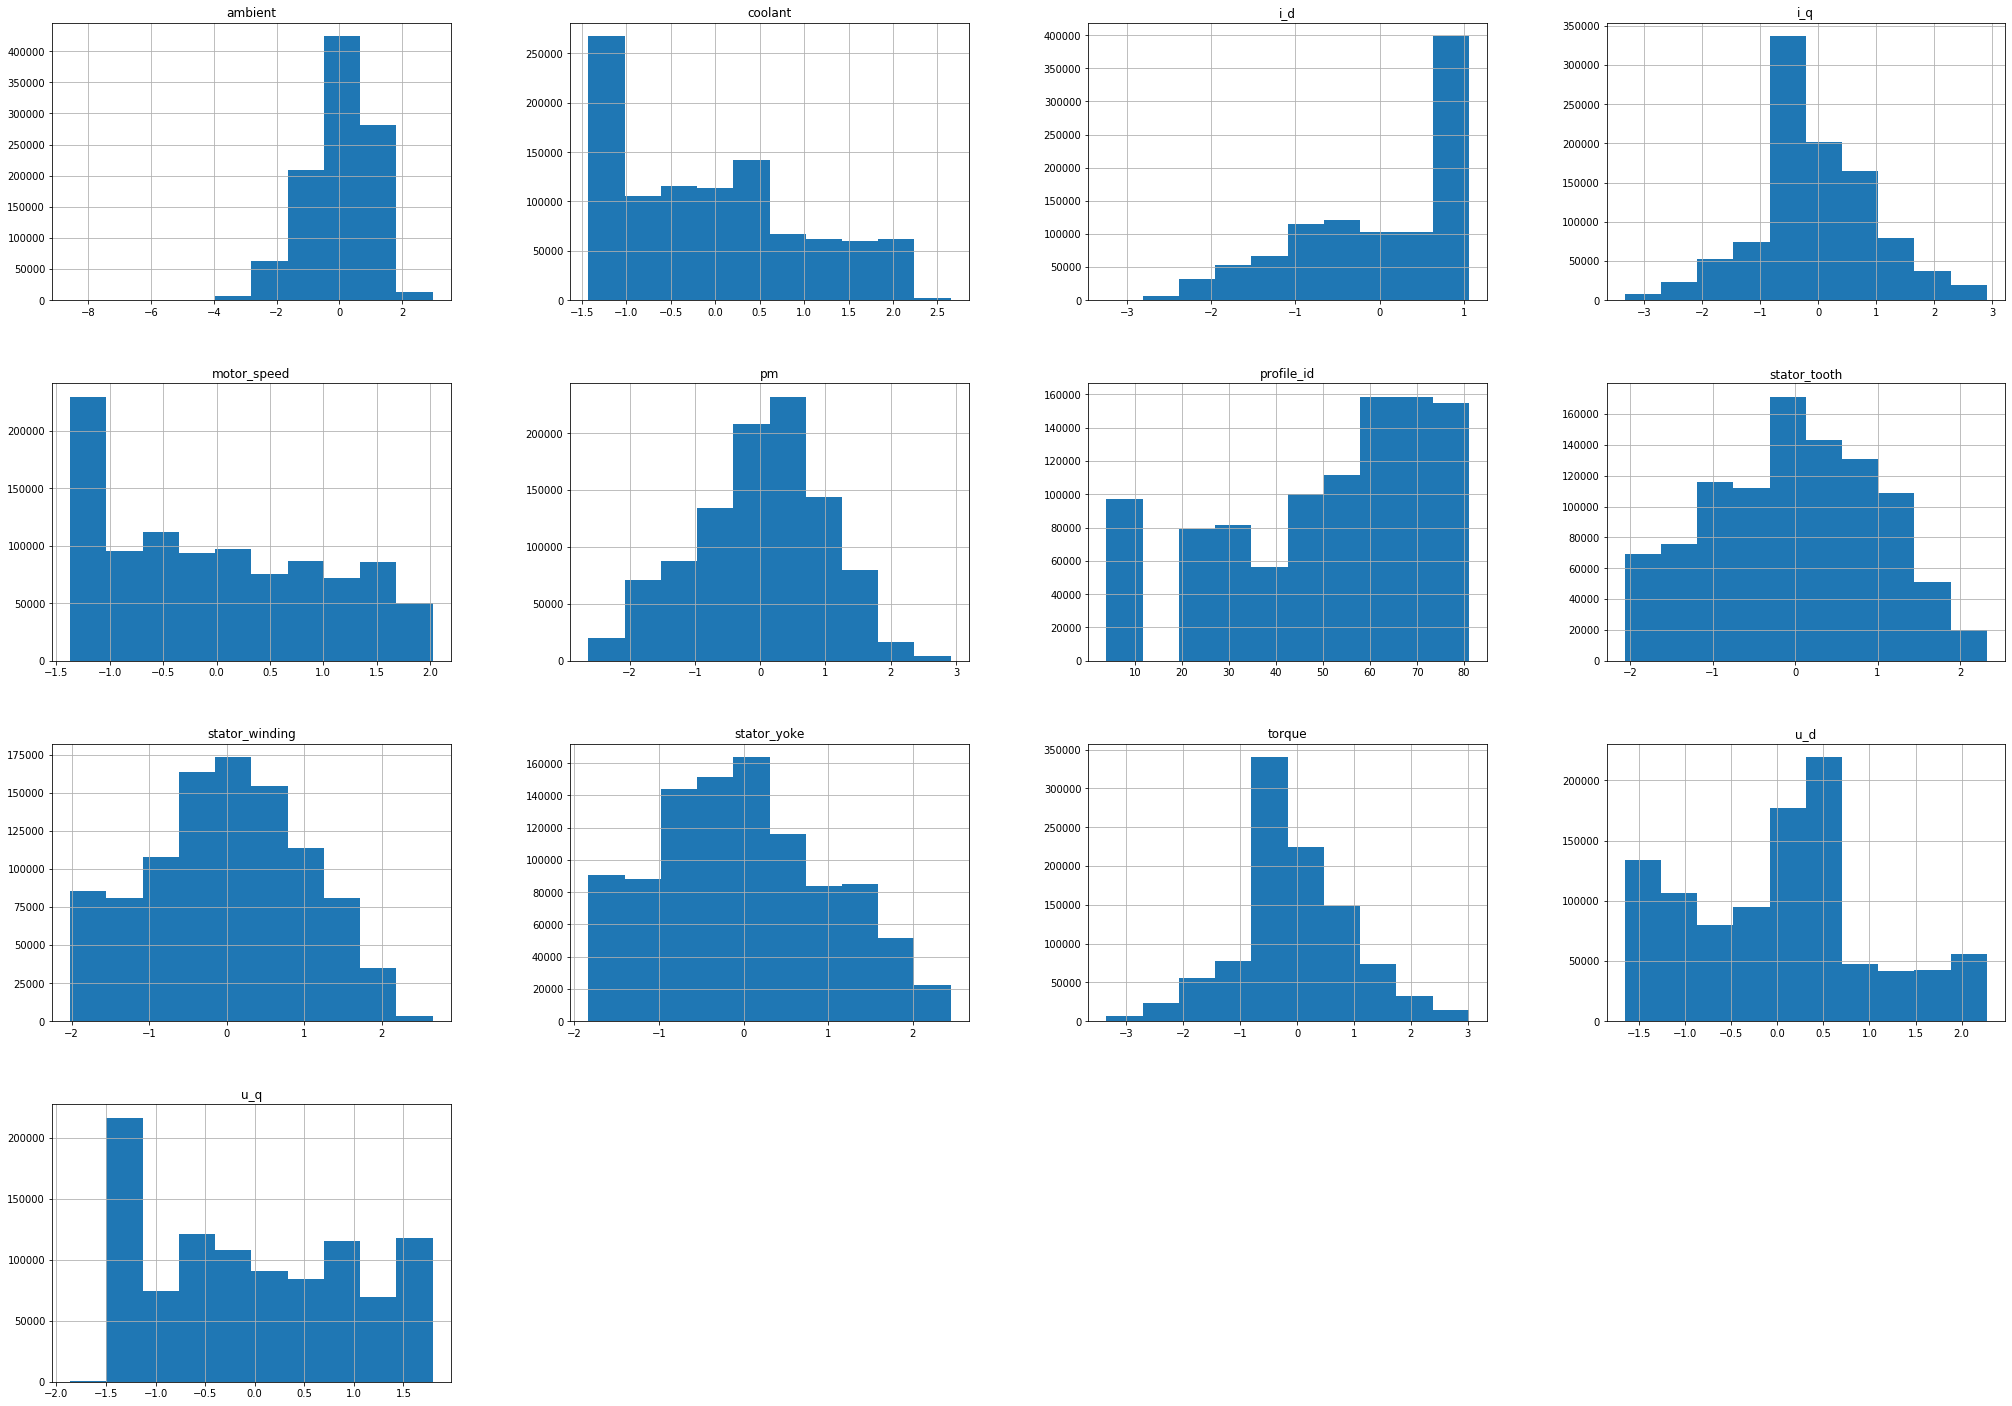

In [9]:
motor.hist(figsize = (35,25))
plt.show()

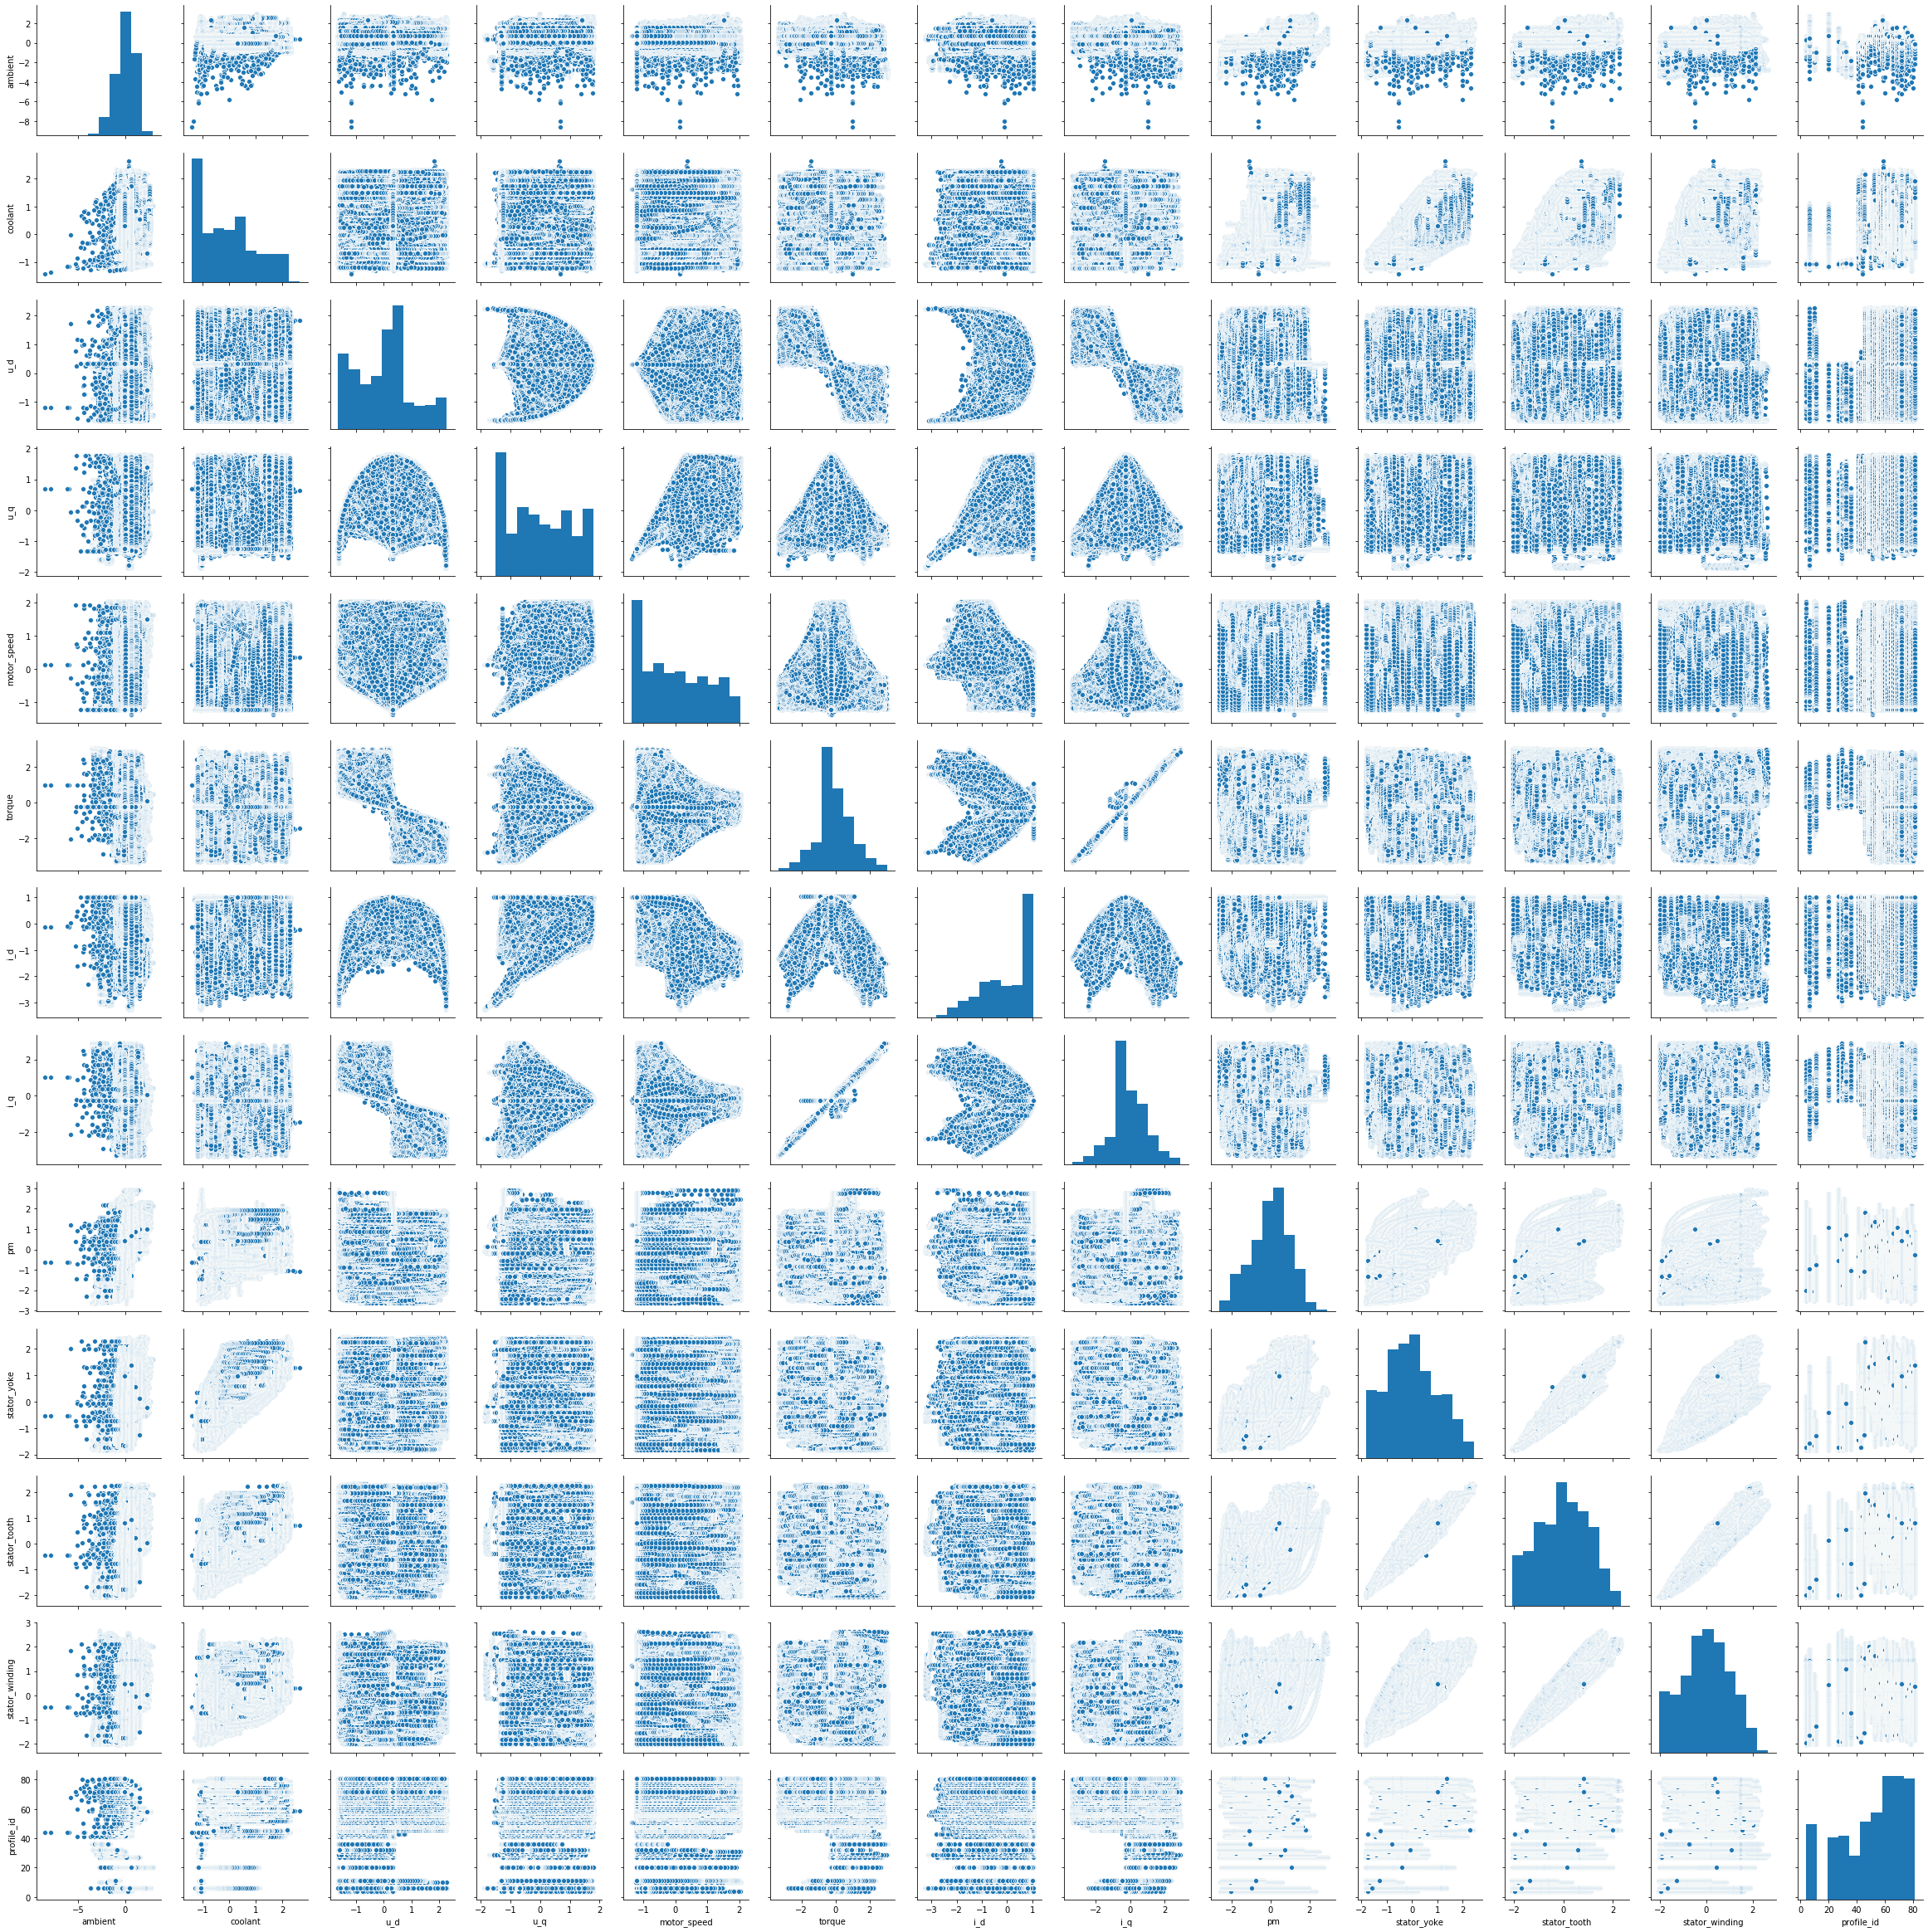

In [8]:
sns.pairplot(motor)

In [10]:
#checking for duplicates in the dataset
motor1=motor.drop_duplicates(keep='first')

In [11]:
motor1.shape

(998070, 13)

There is no duplicate values present in the dataset

Text(0.5, 1.0, 'count of profile_id')

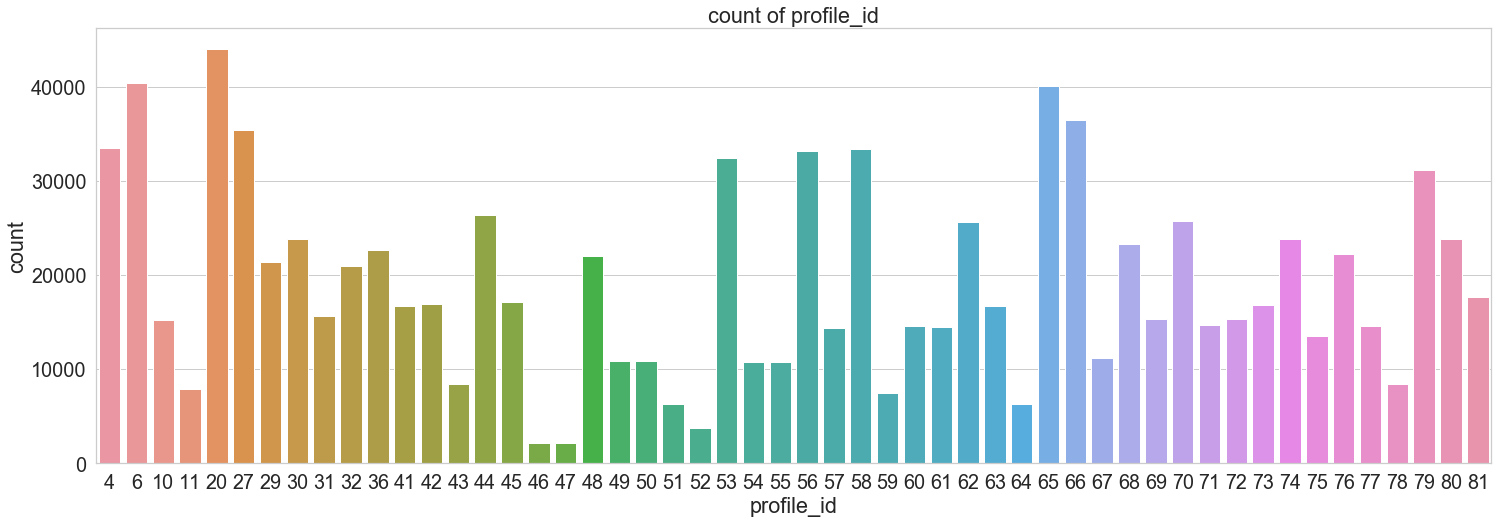

In [9]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (25,8))
sns.countplot('profile_id',data=motor).set_title('count of profile_id')

Text(0.5, 1.0, 'Count of profile_id')

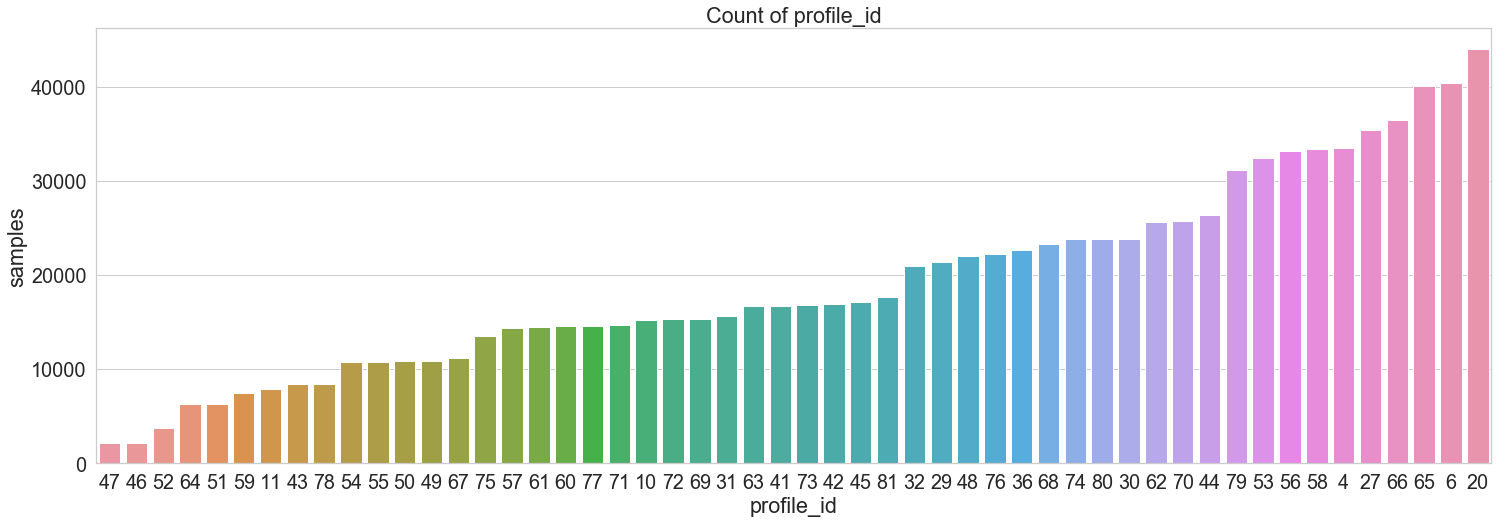

In [10]:
#barplot for profile_id 
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (25,8))
grpd = motor.groupby(['profile_id'])
_df = grpd.size().sort_values().rename('samples').reset_index()
ordered_ids = _df.profile_id.values.tolist()
sns.barplot(y='samples', x='profile_id', data=_df, order=ordered_ids).set_title('Count of profile_id')

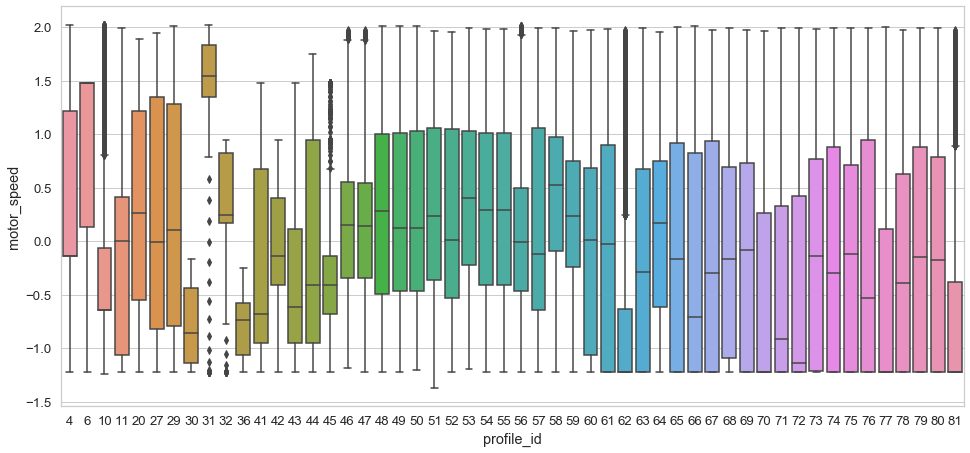

In [11]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (55,25))
plt.subplot(3,3,1)
sns.boxplot(x='profile_id', y='motor_speed', data=motor)

In [6]:
x=motor.drop("motor_speed",axis=1)
y=motor.iloc[:,5:6]
x.head()

ambient   coolant       u_d       u_q    torque       i_d       i_q  \
0 -0.752143 -1.118446  0.327935 -1.297858 -0.250182  1.029572 -0.245860   
1 -0.771263 -1.117021  0.329665 -1.297686 -0.249133  1.029509 -0.245832   
2 -0.782892 -1.116681  0.332771 -1.301822 -0.249431  1.029448 -0.245818   
3 -0.780935 -1.116764  0.333700 -1.301852 -0.248636  1.032845 -0.246955   
4 -0.774043 -1.116775  0.335206 -1.303118 -0.248701  1.031807 -0.246610   

         pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -2.521900    -1.830498     -2.062795       -2.018145           4

In [7]:
y.head()

torque
0 -0.250182
1 -0.249133
2 -0.249431
3 -0.248636
4 -0.248701

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
#shape of train and test
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(698649, 12) (698649, 1)
(299421, 12) (299421, 1)


# MODEL BUILDING

In [13]:
#Multi Linear Regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred=lm.predict(test_x)
y_pred

array([[-0.25563973],
       [-0.17604597],
       [ 1.6692004 ],
       ...,
       [-0.25563973],
       [-0.25563973],
       [-0.25563973]])

In [15]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,test_y)
score

1.0

In [16]:
#MSE
import sklearn
sklearn.metrics.mean_squared_error(test_y,y_pred)

5.287846290279702e-29

In [17]:
#RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(test_y,y_pred))

7.271757896327202e-15

In [18]:
#Ridge Regressioin
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(train_x,train_y)
pred = ridgeReg.predict(test_x)
r2_score(test_y,pred)


0.9977964088862412

In [19]:
#MSE for Ridge Regression
mean_squared_error(test_y,pred)

0.002186332121328527

In [20]:
#Lasso Regression 
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(train_x,train_y)

pred1 = lassoReg.predict(test_x)
lassoReg.score(test_x,test_y)

-2.8551104534590976e-05

In [21]:
#MSE for Ridge Regression
mean_squared_error(test_y,pred1)

0.9921961156378132

In [22]:
#cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score1=cross_val_score(lm, x, y, cv=10, scoring='r2').mean()
cross_val_score1

1.0

In [23]:
cross_val_score2=cross_val_score(ridgeReg, x, y, cv=10, scoring='r2').mean()
cross_val_score2

0.9968823798988421

from sklearn.neighbors import KNeighborsRegressor
scr_max = 0
knn_test_score_list = []
knn_train_score_list = []

for i in range(1,train_x.shape[0]+1):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(train_x,train_y)
    knn_test_scr = knn.score(test_x,test_y)
    knn_test_score_list.append(knn_test_scr)
    knn_train_scr = knn.score(train_x,train_y)
    knn_train_score_list.append(knn_train_scr)
    if knn_test_scr >= scr_max:
        scr_max = knn_test_scr
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

In [6]:
#creating a model for SVM
from sklearn.svm import SVR
SVR=SVR(kernel='linear')
SVR.fit(train_x,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
SVR_y_pred=SVR.predict(test_x)
SVR_y_pred

array([-0.19318786, -0.18180221,  1.67323877, ..., -0.24396746,
       -0.22931147, -0.22426686])

In [8]:
from sklearn.metrics import r2_score
SVR_score=r2_score(SVR_y_pred,test_y)
SVR_score

0.9986492943220231

#n_jobs :int or None, optional (default=None)
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

oob_scorebool, optional (default=False)
whether to use out-of-bag samples to estimate the R^2 on unseen data.



In [9]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, 
                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                         max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                         bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                         warm_start=False, )

In [10]:
RF.fit(train_x,train_y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [11]:
RF_y_pred=RF.predict(test_x)

In [12]:
from sklearn.metrics import r2_score
RF_score=r2_score(RF_y_pred,test_y)
RF_score

0.999999972708108

In [12]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(base_estimator=RF,n_estimators=50,learning_rate=1,loss='linear')

In [ ]:
ad.fit(train_x,train_y)
ada_y_pred=ad.predict(test_x)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
AdaBoost_RF_score=r2_score(ada_y_pred,test_y)
AdaBoost_RF_score

1.0

In [12]:
#xgboost
import xgboost as xgb
xgb = xgb.XGBRegressor(base_estimator=RF,n_estimators=50,learning_rate=1,loss='linear')
xgb.fit(train_x,train_y)

[10:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                  criterion='mse',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=10, n_jobs=None,
                                                  oob_score=False,
                                                  random_state=None, verbose=0,
                                                  warm_star

In [14]:
xgb.fit(train_x,train_y)
xbg_y_pred=xgb.predict(test_x)

[10:47:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
from sklearn.metrics import r2_score
XGBBoost_RF_score=r2_score(xbg_y_pred,test_y)
XGBBoost_RF_score

0.9998895615704778

In [18]:
# BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor(base_estimator=RF,n_estimators=50,)
BR.fit(train_x,train_y)
BR_y_pred=BR.predict(test_x)
BR_score=r2_score(BR_y_pred,test_y)
BR_score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.9999999784106658

In [20]:
#Nueral Networks MLPRegressor
from sklearn.neural_network import MLPRegressor
mlpR= MLPRegressor(hidden_layer_sizes=(100,))
mlpR.fit(train_x,train_y)
mlpr_y_pred=mlpR.predict(test_x)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
NN_score=r2_score(mlpr_y_pred,test_y)
NN_score

0.99999881386546